<a href="https://colab.research.google.com/github/FabioPira/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCCION**
El objetivo de este análisis es apoyar al Sr. Juan en la toma de decisión sobre qué tienda de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento.
Para ello, se analizaron los datos de ventas de las cuatro tiendas,

### Importación de datos



In [1]:
import pandas as pd

import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1, encoding="latin1")
tienda2 = pd.read_csv(url2, encoding="latin1")
tienda3 = pd.read_csv(url3, encoding="latin1")
tienda4 = pd.read_csv(url4, encoding="latin1")

# Asignar tienda
tienda1["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"


#1. Análisis de facturación



In [2]:
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df.head()


,Producto,CategorÃ­a del Producto,Precio,Costo de envÃ­o,Fecha de Compra,Vendedor,Lugar de Compra,CalificaciÃ³n,MÃ©todo de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,ElectrÃ³nicos,164300.0,6900.0,16/01/2021,Pedro Gomez,BogotÃ¡,4,Tarjeta de crÃ©dito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,MedellÃ­n,1,Tarjeta de crÃ©dito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crÃ©dito,1,10.39972,-75.51444,Tienda 1
3,Microondas,ElectrodomÃ©sticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,MedellÃ­n,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Producto                 9435 non-null   object 
 1   CategorÃ­a del Producto  9435 non-null   object 
 2   Precio                   9435 non-null   float64
 3   Costo de envÃ­o          9435 non-null   float64
 4   Fecha de Compra          9435 non-null   object 
 5   Vendedor                 9435 non-null   object 
 6   Lugar de Compra          9435 non-null   object 
 7   CalificaciÃ³n            9435 non-null   int64  
 8   MÃ©todo de pago          9435 non-null   object 
 9   Cantidad de cuotas       9435 non-null   int64  
 10  lat                      9435 non-null   float64
 11  lon                      9435 non-null   float64
 12  tienda                   9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


,0
Producto,0
CategorÃ­a del Producto,0
Precio,0
Costo de envÃ­o,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
CalificaciÃ³n,0
MÃ©todo de pago,0
Cantidad de cuotas,0


# 1. Ingresos totales por tienda

In [4]:
facturacion_tienda = (
    df.groupby("tienda")["Precio"]
      .sum()
      .sort_values(ascending=False)
)

facturacion_tienda



,Precio
tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


se observa una diferencia clara en los ingresos generados por cada una. La tienda con menor facturación presenta un desempeño económico inferior, lo que la posiciona como una posible candidata para su venta

# 2. Ventas por categoría

In [5]:
top_categorias_por_tienda = (
    df.groupby(["tienda", "CategorÃ­a del Producto"])
      .size()
      .reset_index(name="ventas")
      .sort_values(["tienda", "ventas"], ascending=[True, False])
      .groupby("tienda")
      .head(3)
)

top_categorias_por_tienda



,tienda,CategorÃ­a del Producto,ventas
7,Tienda 1,Muebles,465
3,Tienda 1,ElectrÃ³nicos,448
5,Tienda 1,Juguetes,324
15,Tienda 2,Muebles,442
11,Tienda 2,ElectrÃ³nicos,422
13,Tienda 2,Juguetes,313
23,Tienda 3,Muebles,499
19,Tienda 3,ElectrÃ³nicos,451
21,Tienda 3,Juguetes,315
31,Tienda 4,Muebles,480


In [6]:
top5_categorias_ingresos = (
    df.groupby("CategorÃ­a del Producto")["Precio"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

top5_categorias_ingresos


,Precio
CategorÃ­a del Producto,
ElectrÃ³nicos,1.660576e+09
ElectrodomÃ©sticos,1.324751e+09
Muebles,7.576610e+08
Instrumentos musicales,3.487726e+08
Deportes y diversiÃ³n,1.429777e+08


In [7]:
categorias_top5 = top5_categorias_ingresos.index
tienda_top_por_categoria = (
    df[df["CategorÃ­a del Producto"].isin(categorias_top5)]
      .groupby(["CategorÃ­a del Producto", "tienda"])["Precio"]
      .sum()
      .reset_index()
)
tienda_lider_categoria = (
    tienda_top_por_categoria
    .loc[
        tienda_top_por_categoria
        .groupby("CategorÃ­a del Producto")["Precio"]
        .idxmax()
    ]
)

tienda_lider_categoria


,CategorÃ­a del Producto,tienda,Precio
0,Deportes y diversiÃ³n,Tienda 1,39290000.0
4,ElectrodomÃ©sticos,Tienda 1,363685200.0
8,ElectrÃ³nicos,Tienda 1,429493500.0
13,Instrumentos musicales,Tienda 2,104990300.0
18,Muebles,Tienda 3,201072100.0


# 3. Calificación promedio de la tienda


In [8]:
calificacion_promedio = (
    df.groupby("tienda")["CalificaciÃ³n"]
      .mean()
      .round(2)
)

calificacion_promedio



,CalificaciÃ³n
tienda,
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos

In [9]:
ventas_producto = (
    df.groupby(["tienda", "Producto"])
      .size()
      .reset_index(name="cantidad_vendida")
)



In [10]:
producto_mas_vendido = (
    ventas_producto
    .loc[ventas_producto.groupby("tienda")["cantidad_vendida"].idxmax()]
)

producto_mas_vendido



,tienda,Producto,cantidad_vendida
1,Tienda 1,Armario,60
75,Tienda 2,Iniciando en programaciÃ³n,65
129,Tienda 3,Kit de bancas,57
163,Tienda 4,Cama box,62


In [11]:
producto_menos_vendido = (
    ventas_producto
    .loc[ventas_producto.groupby("tienda")["cantidad_vendida"].idxmin()]
)

producto_menos_vendido




,tienda,Producto,cantidad_vendida
4,Tienda 1,Auriculares con micrÃ³fono,33
77,Tienda 2,Juego de mesa,32
111,Tienda 3,Bloques de construcciÃ³n,35
175,Tienda 4,Guitarra elÃ©ctrica,33


# 5. Envío promedio por tienda

In [12]:
envio_promedio = (
    df.groupby("tienda")["Costo de envÃ­o"]
      .mean()
      .round(2)
)

envio_promedio


,Costo de envÃ­o
tienda,
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46


In [13]:
resumen_tienda = (
    df.groupby("tienda")
      .agg(
          ingresos_totales=("Precio", "sum"),
          costo_envio_total=("Costo de envÃ­o", "sum")
      )
)

resumen_tienda




,ingresos_totales,costo_envio_total
tienda,,
Tienda 1,1.150880e+09,61377900.0
Tienda 2,1.116344e+09,59485100.0
Tienda 3,1.098020e+09,58516600.0
Tienda 4,1.038376e+09,55317400.0


In [14]:
resumen_tienda["% Costo de envÃ­o / ingresos"] = (
    resumen_tienda["costo_envio_total"] / resumen_tienda["ingresos_totales"] * 100
).round(2)

resumen_tienda


,ingresos_totales,costo_envio_total,% Costo de envÃ­o / ingresos
tienda,,,
Tienda 1,1.150880e+09,61377900.0,5.33
Tienda 2,1.116344e+09,59485100.0,5.33
Tienda 3,1.098020e+09,58516600.0,5.33
Tienda 4,1.038376e+09,55317400.0,5.33


# 5. Generar Gràfico

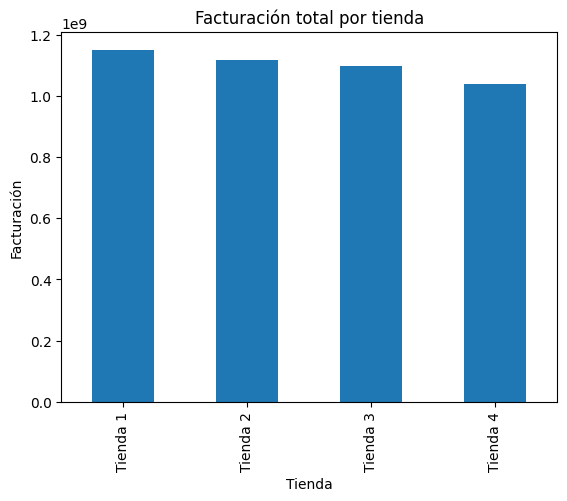

In [15]:
import matplotlib.pyplot as plt

facturacion_tienda = df.groupby("tienda")["Precio"].sum()

facturacion_tienda.plot(kind="bar")
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación")
plt.show()


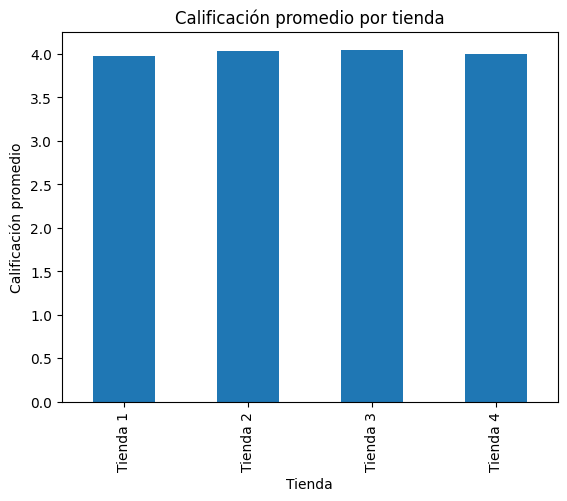

In [16]:
calificacion_promedio = df.groupby("tienda")["CalificaciÃ³n"].mean()

calificacion_promedio.plot(kind="bar")
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.show()


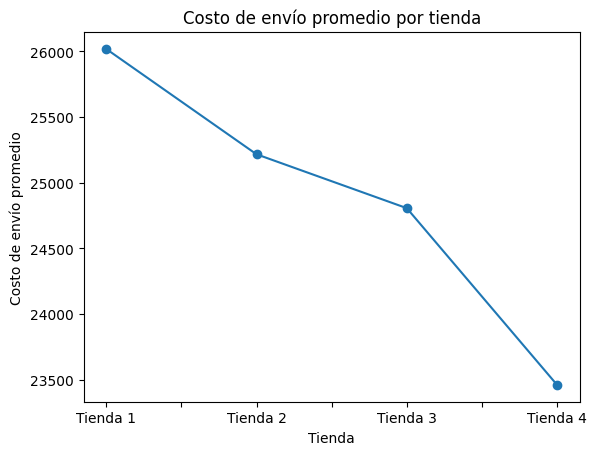

In [17]:
envio_promedio = df.groupby("tienda")["Costo de envÃ­o"].mean()

envio_promedio.plot(kind="line", marker="o")
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()


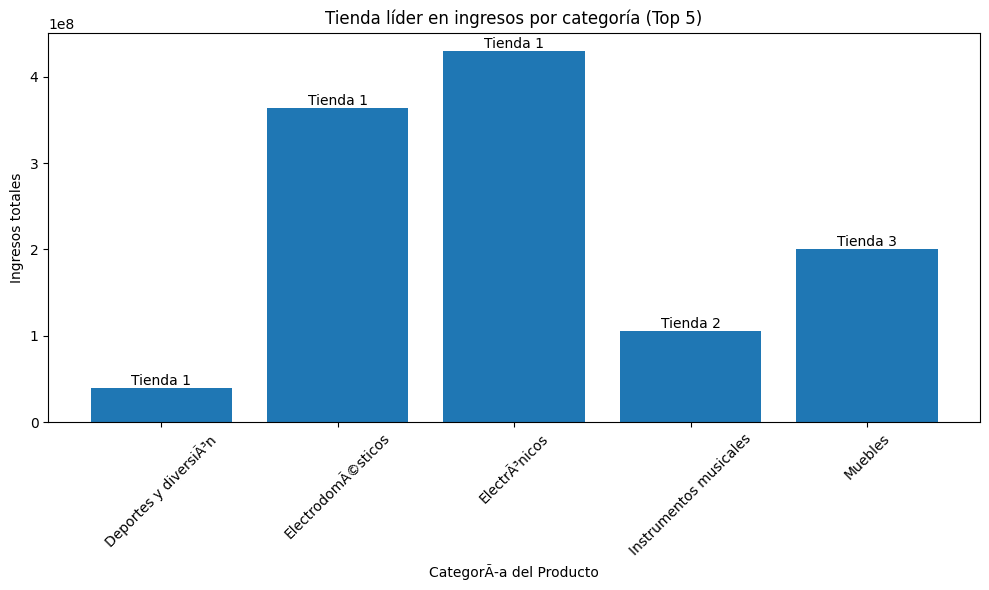

In [18]:
plt.figure(figsize=(10,6))

bars = plt.bar(
    tienda_lider_categoria["CategorÃ­a del Producto"],
    tienda_lider_categoria["Precio"]
)

for bar, tienda in zip(bars, tienda_lider_categoria["tienda"]):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        tienda,
        ha='center',
        va='bottom'
    )

plt.title("Tienda líder en ingresos por categoría (Top 5)")
plt.xlabel("CategorÃ­a del Producto")
plt.ylabel("Ingresos totales")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



#Conclusiòn

Vender la Tienda 4 es la opción más adecuada, ya que segun los datos analizados y representados en las graficas anteriores, es la que menos ingresos tiene en ventas, y los productos que mas vende estan en categorias de menor valor, esto nos puede dar indicios de menor ganancia.

Presenta los menores ingresos totales, lo que evidencia un bajo desempeño financiero.

Registra un menor volumen de ventas pora las categorías que mas se venden.

El costo de envío no representa una diferencia relevante que pueda compensar sus debilidades.